# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [2]:
online_rt = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv',encoding = 'latin1')

### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

<IPython.core.display.Javascript object>


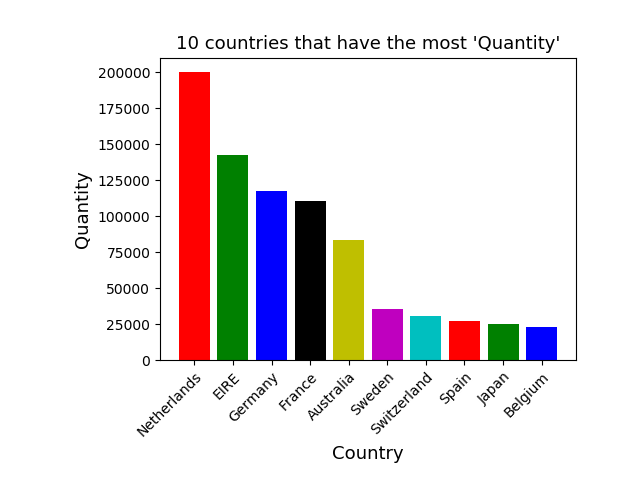

In [3]:
temp = online_rt[~online_rt["Country"].isin(['United Kingdom'])]
temp = pd.DataFrame(temp.groupby("Country")["Quantity"].sum())
temp = temp.sort_values(by = "Quantity",ascending = False)[:10]
plt.figure()
plt.bar(temp.index,temp.Quantity,color=list('rgbkymc'))
plt.xticks(rotation = 45,rotation_mode = "anchor",ha = "right")
plt.subplots_adjust(bottom = 0.25,left = 0.25) #SO THAT AXIS TEXT DON'T RUN OFf THE IMAGE
plt.xlabel("Country",fontsize = 13)
plt.ylabel("Quantity",fontsize = 13)
plt.title("10 countries that have the most 'Quantity'",fontsize = 13);

### Step 5.  Exclude negative Quantity entries

In [4]:
online_rt = online_rt[~(online_rt["Quantity"] < 0)]
online_rt.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

In [5]:
temp = online_rt[~online_rt["Country"].isin(['United Kingdom'])]
temp = temp.groupby(["Country","CustomerID"]).sum()
countries = temp.index.get_level_values(0).tolist()
temp["Country"] = countries
temp = temp[temp["Country"].isin(["Netherlands","EIRE","Germany"])][["Quantity","UnitPrice"]]
temp

Quantity  UnitPrice
Country     CustomerID                     
EIRE        14016.0         2125     635.88
            14156.0        57885    5357.68
            14911.0        80515   26185.72
Germany     12426.0          258     118.09
            12427.0          533     142.26
...                          ...        ...
Netherlands 12789.0            4      91.85
            12790.0          166      82.92
            12791.0           97      16.85
            12802.0          314      63.00
            14646.0       197491    5176.09

[106 rows x 2 columns]

In [6]:
temp.loc[("EIRE"),:]


,Quantity,UnitPrice
CustomerID,,
14016.0,2125,635.88
14156.0,57885,5357.68
14911.0,80515,26185.72


<IPython.core.display.Javascript object>


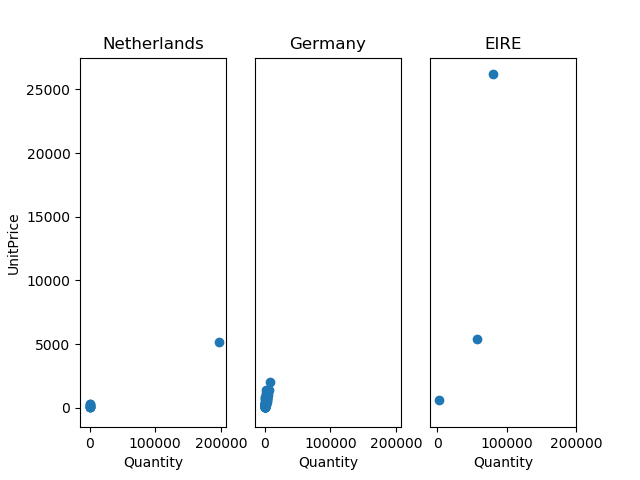

In [13]:
plt.figure()

ax3 = plt.subplot(1,3,3)
ax3.set_xlim(-10000,200000)
ax3.scatter(temp.loc[("EIRE"),:].Quantity,temp.loc[("EIRE"),:].UnitPrice)
ax3.tick_params(axis = 'y',which = 'both',left = False,labelleft = False)
ax3.set_xlabel("Quantity")
ax3.set_title("EIRE")

ax1 = plt.subplot(1,3,1,sharey = ax3)
ax1.scatter(temp.loc[("Netherlands"),:].Quantity,temp.loc[("Netherlands"),:].UnitPrice)
ax1.set_ylabel("UnitPrice")
ax1.set_xlabel("Quantity")
ax1.set_title("Netherlands")

ax2 = plt.subplot(1,3,2,sharex = ax1,sharey = ax3)
ax2.scatter(temp.loc[("Germany"),:].Quantity,temp.loc[("Germany"),:].UnitPrice)
ax2.tick_params(axis = 'y',which = 'both',left = False,labelleft = False)
ax2.set_xlabel("Quantity")
ax2.set_title("Germany");






### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

In [14]:
temp=online_rt.groupby(["Country","CustomerID"]).sum()
temp.head()

Quantity  UnitPrice
Country   CustomerID                     
Australia 12386.0          354      23.91
          12388.0         1462     277.77
          12393.0          816     145.90
          12415.0        77670    2097.08
          12422.0          195      51.12

##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

In [15]:
temp.UnitPrice.dtype

dtype('float64')

##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

In [16]:
online_rt[(online_rt["CustomerID"]==12346.0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom


In [17]:
online_rt[(online_rt["CustomerID"]==12347.0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/10 14:57,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/10 14:57,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/10 14:57,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/10 14:57,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/10 14:57,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,12/7/11 15:52,0.85,12347.0,Iceland
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,12/7/11 15:52,1.95,12347.0,Iceland
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,12/7/11 15:52,0.83,12347.0,Iceland
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,12/7/11 15:52,0.42,12347.0,Iceland


#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

In [18]:
temp = pd.DataFrame(online_rt.groupby(["Country"])["Quantity"].sum())
temp.sort_values(by = "Quantity",ascending = False)[1:4]

,Quantity
Country,
Netherlands,200937
EIRE,147447
Germany,119263


##### Step 7.2.2 

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [19]:
online_rt["Revenue"] = online_rt["Quantity"] * online_rt["UnitPrice"]

##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

In [20]:
temp = online_rt[online_rt["Country"].isin(["Netherlands","EIRE","Germany"])].groupby(["CustomerID","Country"])["Quantity","Revenue"].sum()
temp["AvgPrice"] = temp["Revenue"] / temp["Quantity"]
temp = temp.reset_index().set_index("CustomerID")
temp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Country,Quantity,Revenue,AvgPrice
CustomerID,,,,
12426.0,Germany,258,582.73,2.258643
12427.0,Germany,533,825.80,1.549343
12468.0,Germany,366,729.54,1.993279
12471.0,Germany,8212,19824.05,2.414034
12472.0,Germany,4148,6572.11,1.584405
...,...,...,...,...
14016.0,EIRE,2125,4341.21,2.042922
14156.0,EIRE,57885,117379.63,2.027807
14335.0,Germany,379,468.26,1.235515


##### Step 7.3.3 Plot

<IPython.core.display.Javascript object>


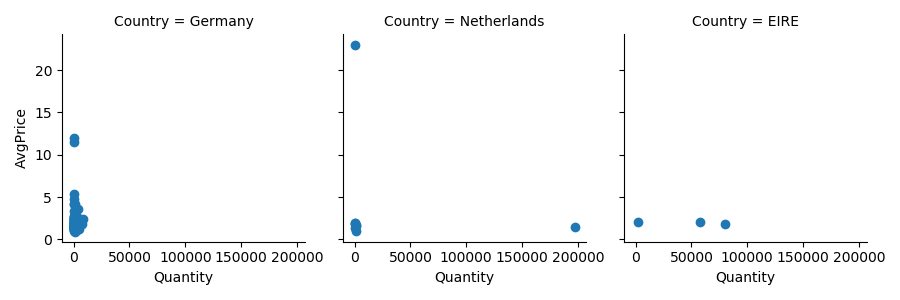

In [21]:
import seaborn as sns
my_plot = sns.FacetGrid(temp,col = "Country")
my_plot.map(plt.scatter,"Quantity","AvgPrice",alpha = 1)

#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each `CustomerID` on a single graph

<IPython.core.display.Javascript object>


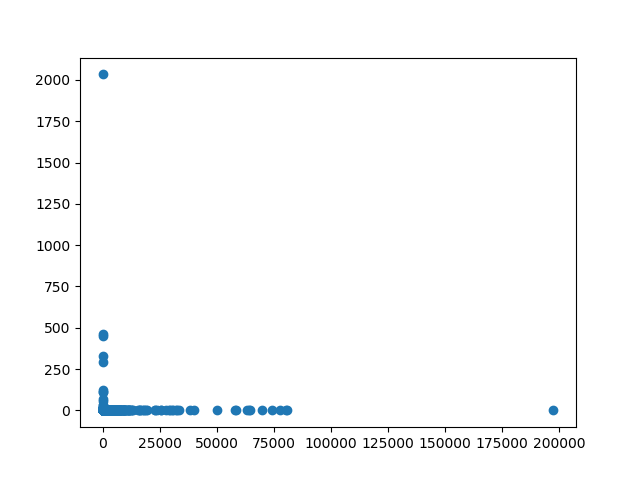

In [214]:
temp = online_rt.groupby("CustomerID").sum()
temp["AVG"] = temp.Revenue / temp.Quantity
plt.figure()
plt.scatter(temp.Quantity,temp.AVG);


##### Step 7.4.2 Zoom in so we can see that curve more clearly

<IPython.core.display.Javascript object>


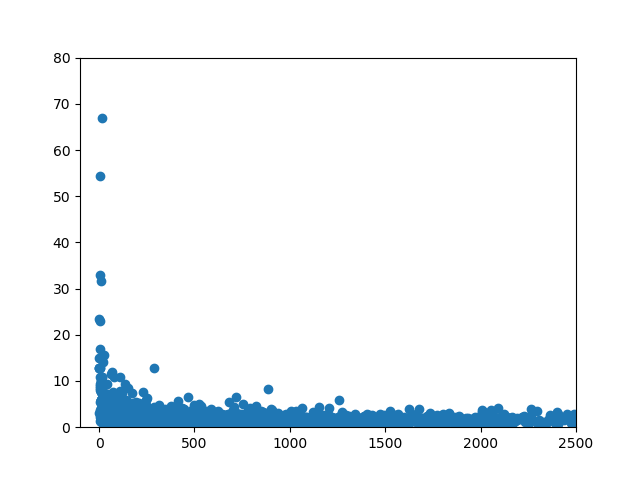

In [215]:
temp = online_rt.groupby("CustomerID").sum()
temp["AVG"] = temp.Revenue / temp.Quantity
plt.figure()
plt.scatter(temp.Quantity,temp.AVG)
plt.xlim(-100,2500)
plt.ylim(0,80);

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`.

In [33]:
Range = np.arange(0,50,1)
temp = online_rt.groupby(pd.cut(online_rt["UnitPrice"],Range))["Quantity","Revenue"].sum()
temp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Quantity,Revenue
UnitPrice,,
"(0, 1]",2123919,1.107775e+06
"(1, 2]",1841466,2.691765e+06
"(2, 3]",837931,2.024143e+06
"(3, 4]",243381,8.651018e+05
"(4, 5]",269647,1.219377e+06
"(5, 6]",68226,3.910014e+05
"(6, 7]",40356,2.689226e+05
"(7, 8]",39984,3.062052e+05
"(8, 9]",45187,3.800438e+05


#### 8.3 Plot.

<IPython.core.display.Javascript object>


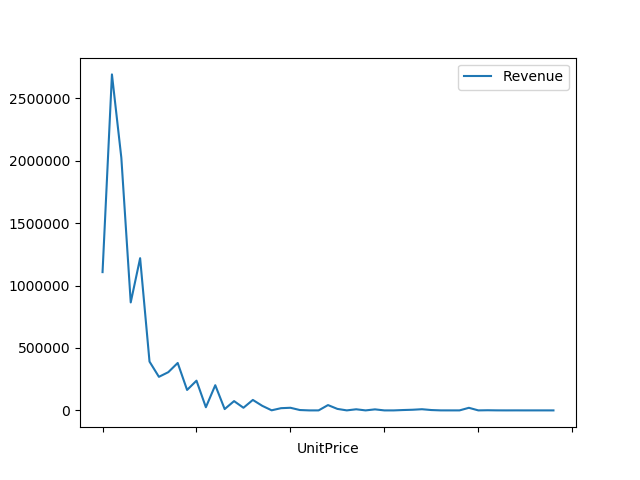

In [34]:

temp = temp.drop("Quantity",axis = 1)
temp.plot()

#### 8.4 Make it look nicer.
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

In [39]:
temp.Revenue=temp.Revenue / 1000000

<IPython.core.display.Javascript object>


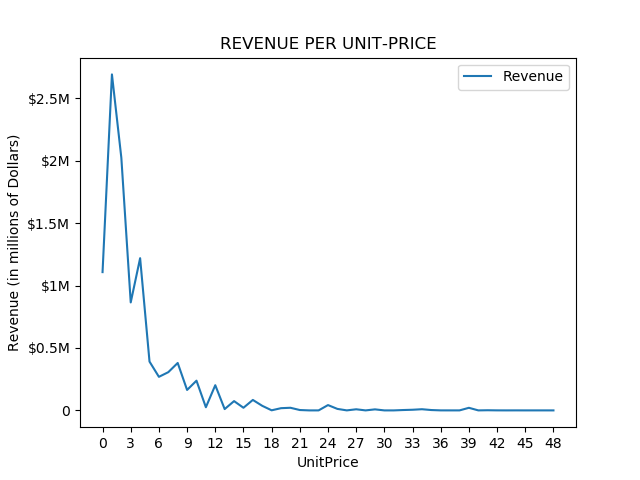

In [70]:
temp.plot()
plt.title("REVENUE PER UNIT-PRICE")
plt.ylabel("Revenue (in millions of Dollars)")
plt.yticks(np.arange(0,3,0.5),["0","$0.5M","$1M","$1.5M","$2M","$2.5M"])
plt.xticks(np.arange(0,50,3),np.arange(0,50,3));

### BONUS: Create your own question and answer it.

## TOP 10 COUNTRIES WITH MOST CUSTOMERS

<IPython.core.display.Javascript object>


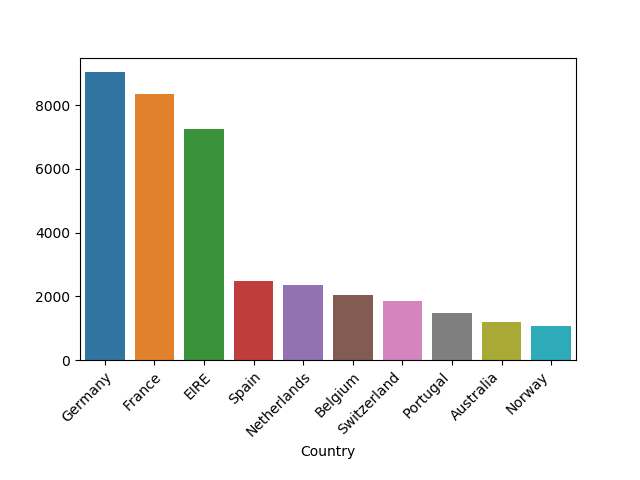

In [93]:
plt.figure()
df = online_rt.groupby("Country")["CustomerID"].count().sort_values(ascending = False)[1:11]  #UK REMOVED BEING A OUTLIER
plt.xticks(rotation = 45,rotation_mode = "anchor",ha ="right")
plt.subplots_adjust(bottom = 0.25)
sns.barplot(df.index,df.values);

In [92]:
online_rt.groupby("Country")["CustomerID"].count().sort_values(ascending = False)

Country
United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


## OBSERVATION
As we can see that United Kingdom has extreme amount of customers ,so it's a outlier and we can't plot it.
With the rest of the Countries there is not much difference in customers after the Top 3 Netherlands,Gremany and Eire.